In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
def chi_sq(x, y, err):
    function = lambda x, a, b: a * x + b
    popt, pcov = curve_fit(function, xdata=x, ydata=y, sigma=err)

    sigma_a = np.sqrt(pcov[0, 0])
    sigma_b = np.sqrt(pcov[1, 1])

    return popt[0], popt[1], sigma_a, sigma_b

In [3]:
sns.set_theme()

In [4]:
df = pd.read_excel('5_1.xlsx')

In [5]:
df

,фон,10с,источник,source,Al,Al1,Al_1,Al2,Al_2,Al3,...,Fe4,Fe_4,Fe5,Fe_5,Fe6,Fe_6,Fe7,Fe_7,FE,sFe
0,178.0,NaN,225707.000000,225521.000000,2.0,105436.000000,105250.000000,56261.000000,56075.000000,34099.0,...,11254.000000,11068.000000,6259.000000,6073.000000,3374.000000,3188.000000,1912.000000,1726.000000,84354.285714,1149.091282
1,196.0,NaN,214145.000000,213959.000000,4.0,104977.000000,104791.000000,56552.000000,56366.000000,34145.0,...,11255.000000,11069.000000,6181.000000,5995.000000,3365.000000,3179.000000,2007.000000,1821.000000,40518.000000,287.351452
2,165.0,NaN,204426.000000,204240.000000,6.0,100559.000000,100373.000000,56367.000000,56181.000000,34385.0,...,11031.000000,10845.000000,6046.000000,5860.000000,3483.000000,3297.000000,2032.000000,1846.000000,20760.428571,284.674680
3,184.0,NaN,196691.000000,196505.000000,8.0,94859.000000,94673.000000,56295.000000,56109.000000,34377.0,...,11175.000000,10989.000000,6326.000000,6140.000000,3430.000000,3244.000000,1968.000000,1782.000000,11097.857143,143.573205
4,215.0,NaN,191209.000000,191023.000000,10.0,94708.000000,94522.000000,56783.000000,56597.000000,34756.0,...,11443.000000,11257.000000,6210.000000,6024.000000,3489.000000,3303.000000,1954.000000,1768.000000,6031.428571,81.816619
5,204.0,NaN,186036.000000,185850.000000,12.0,94869.000000,94683.000000,56540.000000,56354.000000,34374.0,...,11354.000000,11168.000000,6265.000000,6079.000000,3433.000000,3247.000000,1991.000000,1805.000000,3251.714286,49.053074
6,160.0,NaN,182949.000000,182763.000000,14.0,94096.000000,93910.000000,56328.000000,56142.000000,34475.0,...,11475.000000,11289.000000,6235.000000,6049.000000,3490.000000,3304.000000,2049.000000,1863.000000,1801.571429,43.683463
7,186.0,NaN,200166.142857,199980.142857,NaN,98500.571429,98314.571429,56446.571429,56260.571429,34373.0,...,11283.857143,11097.857143,6217.428571,6031.428571,3437.714286,3251.714286,1987.571429,1801.571429,NaN,NaN
8,NaN,NaN,NaN,14413.724535,NaN,NaN,4698.246264,NaN,173.546912,NaN,...,NaN,143.573205,NaN,81.816619,NaN,49.053074,NaN,43.683463,NaN,NaN


In [6]:
l_al = df['Al']
l_pb = df['Pb']
l_fe = df['Fe']
al = df['AL']
pb = df['PB']
fe = df['FE']

In [7]:
N0 = np.ones(9) * 199980.142857
N0err = np.ones(9) * 14413.72454

al_err = df['sAl']
pb_err = df['sPb']
fe_err = df['sFe']


Text(0, 0.5, '$\\ln(N_{0}/N)$')

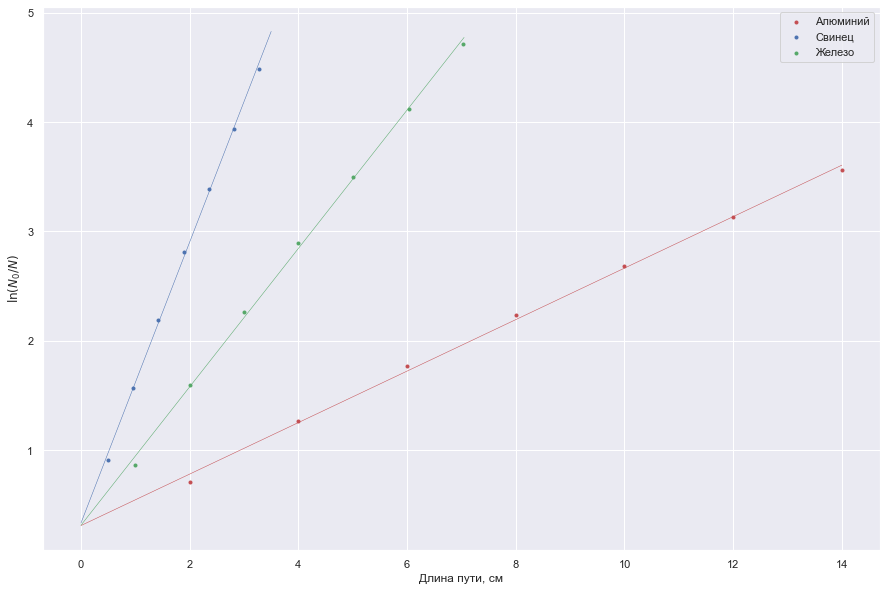

In [8]:
plt.rcParams["figure.figsize"] = (15,10)

div_1 = np.log(N0/al)
plt.scatter(l_al, div_1, marker = '.', color = 'r', label = 'Алюминий')

div_2 = np.log(N0/pb)
plt.scatter(l_pb, div_2, marker = '.', color = 'b', label = 'Свинец')

div_3 = np.log(N0/fe)
plt.scatter(l_fe, div_3, marker = '.', color = 'g', label = 'Железо')

x = np.linspace(0, 14, 50)
a_1, b_1, s_1, e_1 = chi_sq(l_al[0:7], div_1[0:7], None)
y = a_1 * x + b_1
plt.plot(x, y, lw = 0.5, color = 'r')

x = np.linspace(0, 3.5, 50)
a_2, b_2, s_2, e_2 = chi_sq(l_pb[0:7], div_2[0:7], None)
y = a_2 * x + b_2
plt.plot(x, y, lw = 0.5, color = 'b')

x = np.linspace(0, 7.05, 50)
a_3, b_3, s_3, e_3 = chi_sq(l_fe[0:7], div_3[0:7], None)
y = a_3 * x + b_3
plt.plot(x, y, lw = 0.5, color = 'g')

plt.legend()
plt.xlabel('Длина пути, см')
plt.ylabel('$\ln(N_{0}/N)$')

In [9]:
a_1, s_1

(0.2354893878722092, 0.0045269096488662845)

In [10]:
a_2, s_2

(1.2849466559417004, 0.020966407574181178)

In [11]:
a_3, s_3

(0.6329812340685301, 0.010518607614048362)